### CHALLENGE
#### Answer the questions:
#### 1. Obtain the minimum number of civilian casualties(in what month was that?)
#### 2. How many NATO casualties were registered in August 2008?
#### 3. What is the month with the most total number of casualties?
#### 4. Can you make a plot of the distribution of casualties over time?e?

##### Import python liberaries, read data into dataframe, and prepare dataset to analize.

In [562]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
url = ("https://docs.google.com/spreadsheets/d/"\
       "1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/"\
       "export?format=csv&gid=1")
url

'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/export?format=csv&gid=1'

### Data cleaning and transformation

In [564]:
df = pd.read_csv(url, skiprows=[0, -1], thousands=",")
df.tail(2)

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
71,2009.0,December,287.0,87,65.0,33.0,35.0
72,NaN,24498,15507.0,4024,3820.0,1147.0,NaN


In [565]:
# delete the last row since it is not a valid row.
df=df.drop(72)

In [568]:
df.tail(2)

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures
70,2009.0,November,410.0,120,69.0,30.0,32.0
71,2009.0,December,287.0,87,65.0,33.0,35.0


In [570]:
df.isna().sum()

Year                              0
Month                             0
Taliban                           1
Civilians                         0
Afghan forces                     2
Nato (detailed in spreadsheet)    6
Nato - official figures           0
dtype: int64

In [572]:
# check data type for each column
df.dtypes

Year                              float64
Month                              object
Taliban                           float64
Civilians                           int64
Afghan forces                     float64
Nato (detailed in spreadsheet)    float64
Nato - official figures           float64
dtype: object

In [574]:
# fill nan value to 0 in order to do calculations
df.fillna(0, inplace=True)

In [576]:
# Change data type to right type
df['Taliban']=df['Taliban'].astype(int)
df['Afghan forces']=df['Afghan forces'].astype(int)

df['Nato (detailed in spreadsheet)']=df['Nato (detailed in spreadsheet)'].astype(int)
df['Nato - official figures']=df['Nato - official figures'].astype(int)
df['Year']=df['Year'].astype(int)
df.dtypes


Year                               int32
Month                             object
Taliban                            int32
Civilians                          int64
Afghan forces                      int32
Nato (detailed in spreadsheet)     int32
Nato - official figures            int32
dtype: object

In [579]:
# Q1: Obtain the minimum number of civilian casualties(in what month was that?)
# Answer: March has the minimum civilian casualities, 2 casualities.
q1=df.groupby('Month')['Civilians'].min()
q1

Month
April         3
August        6
December     13
February      4
January       4
July          5
June         31
March         2
May          29
November     13
October      14
September     4
Name: Civilians, dtype: int64

In [581]:
# Q2: How many NATO casualties were registered in August 2008?
# Answer: NATO Official figures of casualties were 223 in Aug 2008.
q2= df.groupby('Month')['Nato - official figures'].sum()
q2

Month
April         75
August       223
December      81
February      72
January       55
July         158
June         164
March         80
May          105
November      89
October      143
September    185
Name: Nato - official figures, dtype: int32

In [583]:
total = df['Civilians'] + df['Taliban']+df['Afghan forces'] + df['Nato (detailed in spreadsheet)']+ df['Nato - official figures']

In [585]:
df['Total'] = total
df.head()

,Year,Month,Taliban,Civilians,Afghan forces,Nato (detailed in spreadsheet),Nato - official figures,Total
0,2004,January,15,51,23,0,11,100
1,2004,February,0,7,4,5,2,18
2,2004,March,19,2,0,2,3,26
3,2004,April,5,3,19,0,3,30
4,2004,May,18,29,56,6,9,118


In [587]:
#Q3: What is the month with the most total number of casualties?
# Answer: it is September
df.groupby('Month')['Total'].max().sort_values()

Month
January       294
February      372
April         403
March         412
December      507
November      661
May           682
October       805
June          840
July          922
August        982
September    1271
Name: Total, dtype: int64

<Axes: xlabel='Month'>

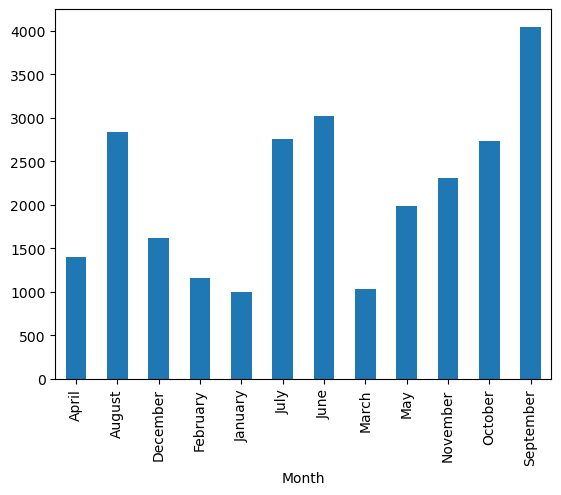

In [592]:
#Q4 Can you make a plot of the distribution of casualties over time?
# Answer: see below plot
q5=df.groupby('Month')['Total'].sum()
q5.plot(kind='bar')